## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import statistics
import pandas as pd
import math
from scipy.stats import t
from scipy.stats import norm
import math
from sklearn.metrics import r2_score


To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

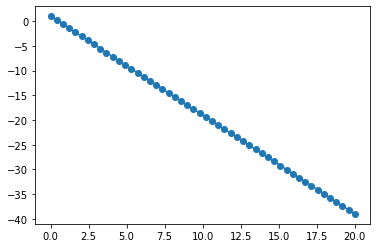

In [5]:
plt.plot( X,y, '-o')


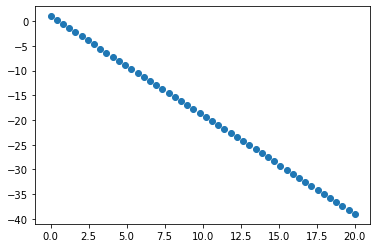

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [5]:
## return theta_0, theta_1 , ho, losses

def optimize_using_GD(X, Y,lr=0.01,iterations=1000):
    theta_0=theta_1=0
    losses=[]
    thetas_0=[]
    thetas_1=[]
    for i in range(0,iterations):
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)

        print(f"****************** Iteration {i} ********************")
        h_0= theta_0 + (theta_1*X)
        print(f"h(X) : {h_0}")
        error=h_0-Y
        mse= (error@error) / (len(error)*2)
        losses.append(mse)
        print(f"Error vector {error} ")
        print(f"MSE {mse} ")
        if i>0 and abs(mse-losses[i-1])<=0.001:
            return theta_0, theta_1,h_0,thetas_0, thetas_1, losses
            
        d_theta0= error.sum() /len(error)
        d_theta1=(error*X).sum() /len(error)
        grad_vector=np.array([d_theta0,d_theta1])
        print("gradien vector: ")
        print(grad_vector)
        print("gradienct vector norm")
        norm = np.linalg.norm(grad_vector)
        print(norm)
        if(norm<= 0.001):
            return theta_0, theta_1,h_0,thetas_0,thetas_1,losses
            
        theta_0=theta_0- (lr*d_theta0)
        theta_1=theta_1-(lr*d_theta1)
        print(f" theta_0 new : {theta_0}")
        print(f"theta_1 new: {theta_1}")
        if(i==iterations-1):
            return theta_0, theta_1,h_0,thetas_0,thetas_1,losses

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [26]:
theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_GD(X, y,lr=0.0005,iterations=300)

****************** Iteration 0 ********************
h(X) : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error vector [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ] 
MSE 249.88775510204084 
gradien vector: 
[ 19.        259.3877551]
gradienct vector norm
260.08269357432516
 theta_0 new : -0.0095
theta_1 new: -0.12969387755102044

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387


Gradient Vector Norm:
3.150846624874574

theta_0_new : -0.13151756202565473
theta_1_new : -1.8941776723448396

****************** Iteration 64 ********************

h(x):
[ -0.13151756  -0.90465131  -1.67778505  -2.45091879  -3.22405254
  -3.99718628  -4.77032002  -5.54345377  -6.31658751  -7.08972126
  -7.862855    -8.63598874  -9.40912249 -10.18225623 -10.95538998
 -11.72852372 -12.50165746 -13.27479121 -14.04792495 -14.82105869
 -15.59419244 -16.36732618 -17.14045993 -17.91359367 -18.68672741
 -19.45986116 -20.2329949  -21.00612865 -21.77926239 -22.55239613
 -23.32552988 -24.09866362 -24.87179736 -25.64493111 -26.41806485
 -27.1911986  -27.96433234 -28.73746608 -29.51059983 -30.28373357
 -31.05686731 -31.83000106 -32.6031348  -33.37626855 -34.14940229
 -34.92253603 -35.69566978 -36.46880352 -37.24193727 -38.01507101]

Error Vector:
[-1.13151756 -1.08832478 -1.04513199 -1.0019392  -0.95874641 -0.91555363
 -0.87236084 -0.82916805 -0.78597527 -0.74278248 -0.69958969 -0.65639691
 -0.61

#### Calculate r2 score

In [27]:
y_pred= theta_0 + theta_1*X


In [28]:
r2_score(y,y_pred)

0.9975395965150151

r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

In [6]:
def plot_losses(losses):
    plt.plot( losses, '-o')

def plot_theats_loss(thetas, losses):
    plt.plot(thetas, losses, '-o')
    plt.xlabel("theta")
    plt.ylabel("loss")

def plot_regressions_lines():
    
    plt.scatter(X, y)
    y_pred= theta_0 + theta_1*X
    for i in range(0,len(thetas_0)):
        y_pred= thetas_0[i] + thetas_1[i]*X
        plt.plot(X, y_pred, color='red')

def plot_best_regression():
    plt.scatter(X, y)
    y_pred= theta_0 + theta_1*X
    plt.plot(X, y_pred, color='red')    
 


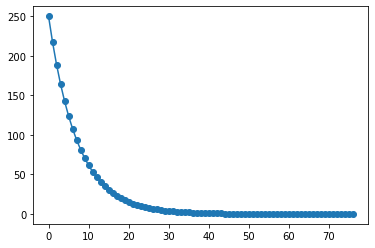

In [32]:
plot_losses(losses)

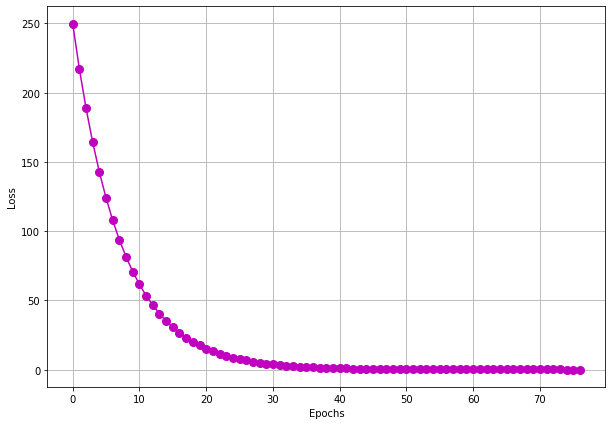

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

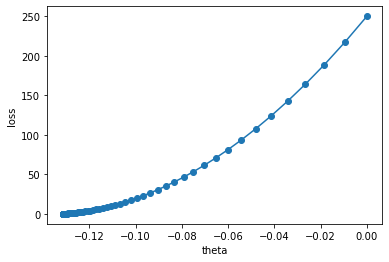

In [37]:

plot_theats_loss(thetas_0, losses)


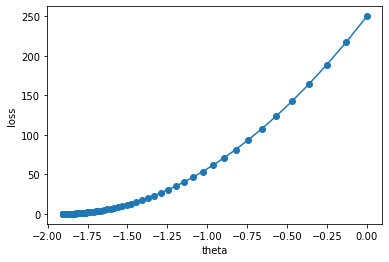

In [38]:
plot_theats_loss(thetas_1, losses)

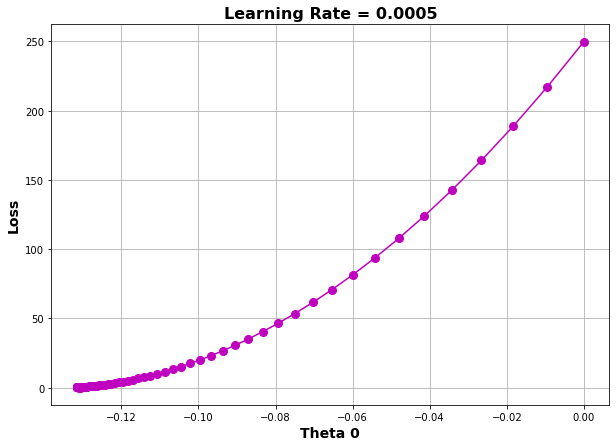

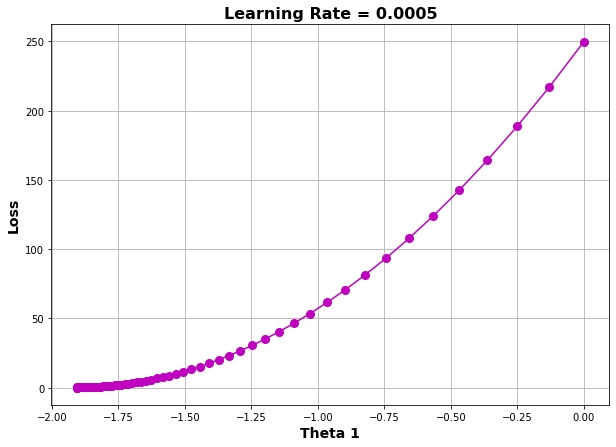

#### Plot all regression lines till converge

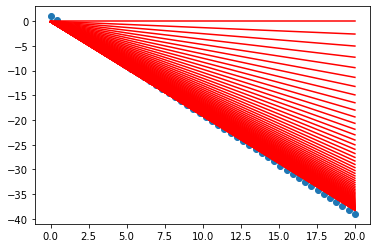

In [47]:
plot_regressions_lines()

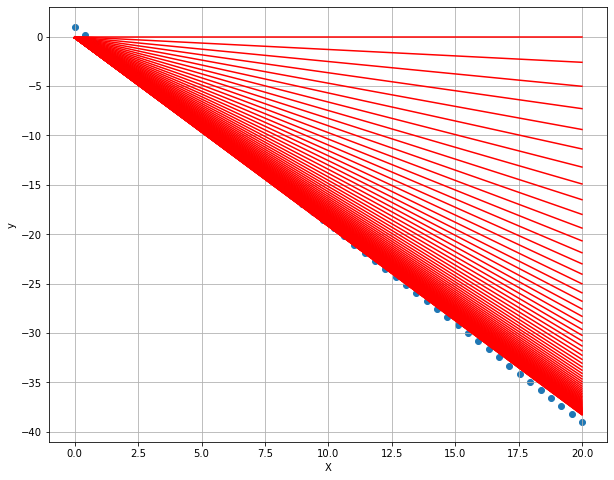

#### Plot the best regression line

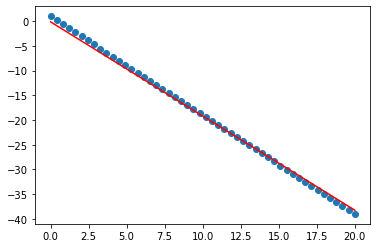

In [44]:

    
plot_best_regression()

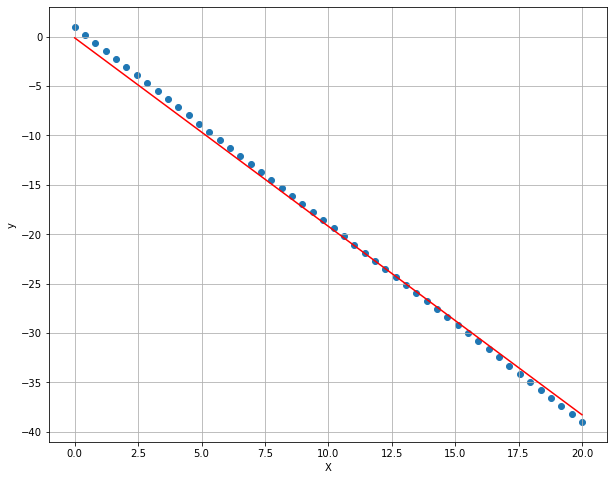

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [48]:
theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_GD(X, y,lr=0.00005,iterations=1000)

****************** Iteration 0 ********************
h(X) : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error vector [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ] 
MSE 249.88775510204084 
gradien vector: 
[ 19.        259.3877551]
gradienct vector norm
260.08269357432516
 theta_0 new : -0.00095
theta_1 new: -0.0129693877551020

h(X) : [ -0.07469615  -0.49368961  -0.91268306  -1.33167651  -1.75066996
  -2.16966341  -2.58865686  -3.00765031  -3.42664376  -3.84563721
  -4.26463066  -4.68362411  -5.10261756  -5.52161101  -5.94060446
  -6.35959791  -6.77859136  -7.19758482  -7.61657827  -8.03557172
  -8.45456517  -8.87355862  -9.29255207  -9.71154552 -10.13053897
 -10.54953242 -10.96852587 -11.38751932 -11.80651277 -12.22550622
 -12.64449967 -13.06349312 -13.48248658 -13.90148003 -14.32047348
 -14.73946693 -15.15846038 -15.57745383 -15.99644728 -16.41544073
 -16.83443418 -17.25342763 -17.67242108 -18.09141453 -18.51040798
 -18.92940143 -19.34839488 -19.76738833 -20.18638179 -20.60537524]
Error vector [-1.07469615 -0.67736307 -0.28002999  0.11730309  0.51463617  0.91196925
  1.30930233  1.70663541  2.10396849  2.50130157  2.89863464  3.29596772
  3.6933008   4.09063388  4.48796696  4.88530004  5.28263312  5.6799662
  6.07729928  6.47463236  6.87196544  7.26929852  7.6666316   8.06396468
  8.46129776  8.85863084  9.

gradien vector: 
[ 3.56307231 51.84523372]
gradienct vector norm
51.967525862462075
 theta_0 new : -0.11070008773237759
theta_1 new: -1.5352328374078954
****************** Iteration 238 ********************
h(X) : [ -0.11070009  -0.73732574  -1.36395138  -1.99057703  -2.61720268
  -3.24382833  -3.87045398  -4.49707962  -5.12370527  -5.75033092
  -6.37695657  -7.00358221  -7.63020786  -8.25683351  -8.88345916
  -9.51008481 -10.13671045 -10.7633361  -11.38996175 -12.0165874
 -12.64321305 -13.26983869 -13.89646434 -14.52308999 -15.14971564
 -15.77634129 -16.40296693 -17.02959258 -17.65621823 -18.28284388
 -18.90946953 -19.53609517 -20.16272082 -20.78934647 -21.41597212
 -22.04259776 -22.66922341 -23.29584906 -23.92247471 -24.54910036
 -25.175726   -25.80235165 -26.4289773  -27.05560295 -27.6822286
 -28.30885424 -28.93547989 -29.56210554 -30.18873119 -30.81535684]
Error vector [-1.11070009 -0.92099921 -0.73129832 -0.54159744 -0.35189656 -0.16219567
  0.02750521  0.21720609  0.40690697  0.5

29.168380062870906
 theta_0 new : -0.12186360831850912
theta_1 new: -1.7020658692110624
****************** Iteration 323 ********************
h(X) : [ -0.12186361  -0.81658437  -1.51130513  -2.2060259   -2.90074666
  -3.59546742  -4.29018819  -4.98490895  -5.67962971  -6.37435047
  -7.06907124  -7.763792    -8.45851276  -9.15323353  -9.84795429
 -10.54267505 -11.23739582 -11.93211658 -12.62683734 -13.3215581
 -14.01627887 -14.71099963 -15.40572039 -16.10044116 -16.79516192
 -17.48988268 -18.18460344 -18.87932421 -19.57404497 -20.26876573
 -20.9634865  -21.65820726 -22.35292802 -23.04764879 -23.74236955
 -24.43709031 -25.13181107 -25.82653184 -26.5212526  -27.21597336
 -27.91069413 -28.60541489 -29.30013565 -29.99485641 -30.68957718
 -31.38429794 -32.0790187  -32.77373947 -33.46846023 -34.16318099]
Error vector [-1.12186361 -1.00025784 -0.87865207 -0.75704631 -0.63544054 -0.51383477
 -0.392229   -0.27062323 -0.14901747 -0.0274117   0.09419407  0.21579984
  0.3374056   0.45901137  0.5806

 theta_0 new : -0.12838891843775904
theta_1 new: -1.81026389922397
****************** Iteration 427 ********************
h(X) : [ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]
Error vector [-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  0.1

MSE 0.390804854272887 
gradien vector: 
[0.28827662 7.80555929]
gradienct vector norm
7.810880820875791
 theta_0 new : -0.1306605182113855
theta_1 new: -1.8584980058080767
****************** Iteration 517 ********************
h(X) : [ -0.13066052  -0.88923113  -1.64780175  -2.40637236  -3.16494298
  -3.92351359  -4.68208421  -5.44065482  -6.19922544  -6.95779605
  -7.71636666  -8.47493728  -9.23350789  -9.99207851 -10.75064912
 -11.50921974 -12.26779035 -13.02636097 -13.78493158 -14.5435022
 -15.30207281 -16.06064343 -16.81921404 -17.57778465 -18.33635527
 -19.09492588 -19.8534965  -20.61206711 -21.37063773 -22.12920834
 -22.88777896 -23.64634957 -24.40492019 -25.1634908  -25.92206142
 -26.68063203 -27.43920264 -28.19777326 -28.95634387 -29.71491449
 -30.4734851  -31.23205572 -31.99062633 -32.74919695 -33.50776756
 -34.26633818 -35.02490879 -35.78347941 -36.54205002 -37.30062063]
Error vector [-1.13066052 -1.0729046  -1.01514869 -0.95739277 -0.89963685 -0.84188094
 -0.78412502 -0.72636

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

In [49]:
y_pred= theta_0 + theta_1*X
r2_score(y,y_pred)


0.9965793400861428

r2_score: 0.9965793400861428


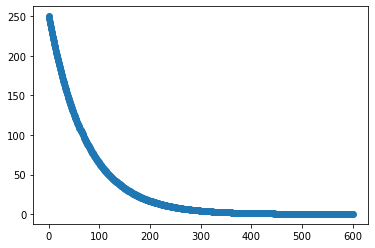

In [50]:
plot_losses(losses)

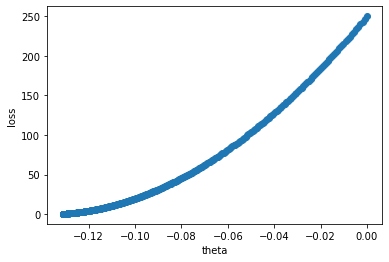

In [51]:
plot_theats_loss(thetas_0, losses)


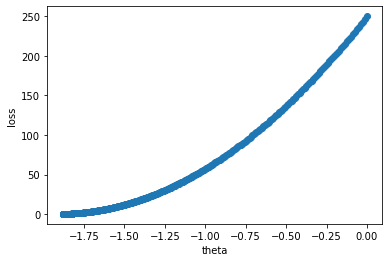

In [52]:
plot_theats_loss(thetas_1, losses)


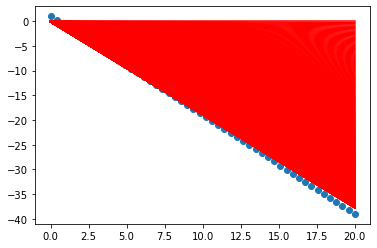

In [53]:
plot_regressions_lines()


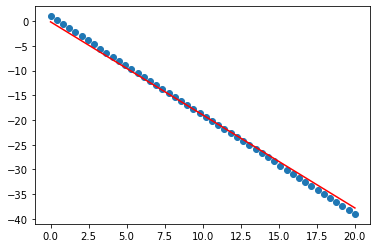

In [54]:
plot_best_regression()


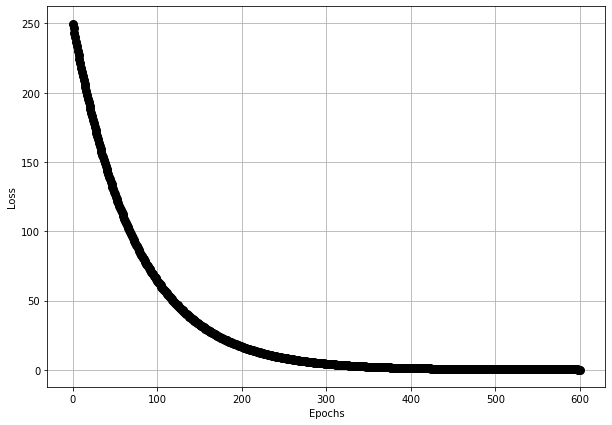

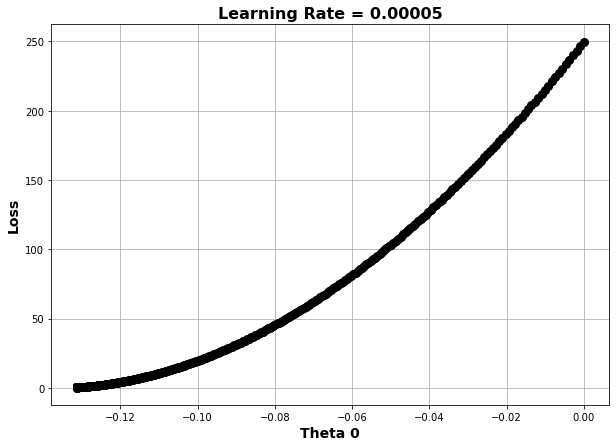

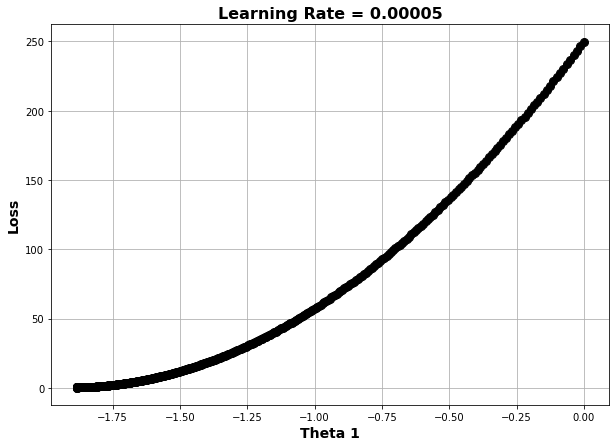

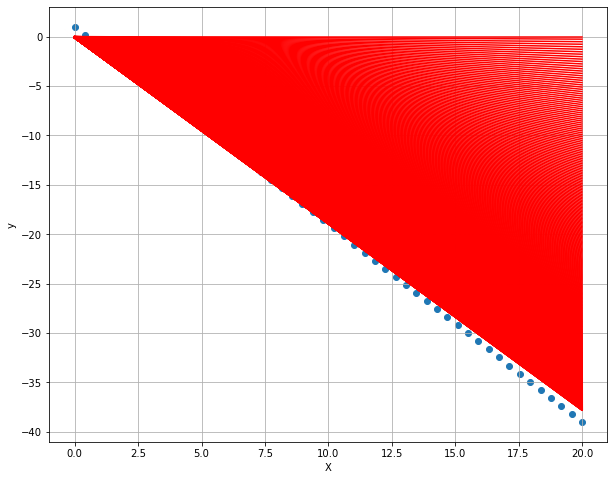

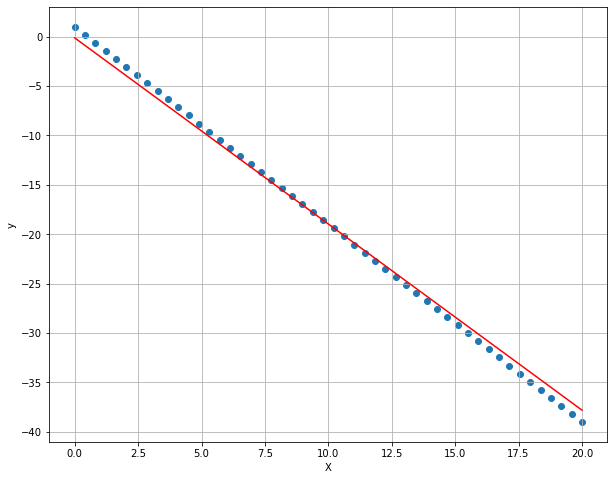

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [55]:

theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_GD(X, y,lr=0.005,iterations=300)

****************** Iteration 0 ********************
h(X) : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error vector [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ] 
MSE 249.88775510204084 
gradien vector: 
[ 19.        259.3877551]
gradienct vector norm
260.08269357432516
 theta_0 new : -0.095
theta_1 new: -1.2969387755102042
*

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

In [56]:
y_pred= theta_0 + theta_1*X
r2_score(y,y_pred)

0.9976200723230484

r2_score: 0.9976200723230484


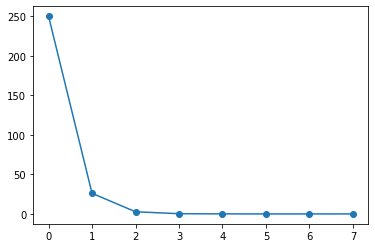

In [57]:

plot_losses(losses)

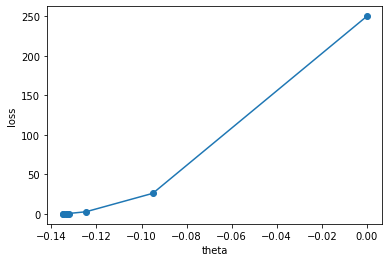

In [58]:

plot_theats_loss(thetas_0, losses)

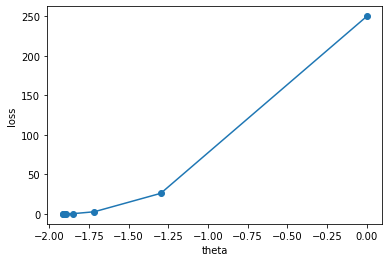

In [59]:

plot_theats_loss(thetas_1, losses)

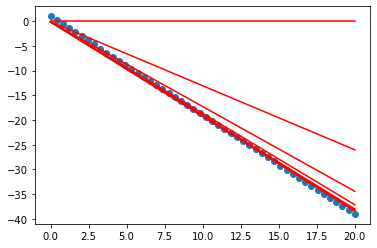

In [61]:
plot_regressions_lines()

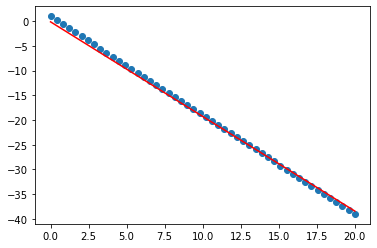

In [60]:
plot_best_regression()


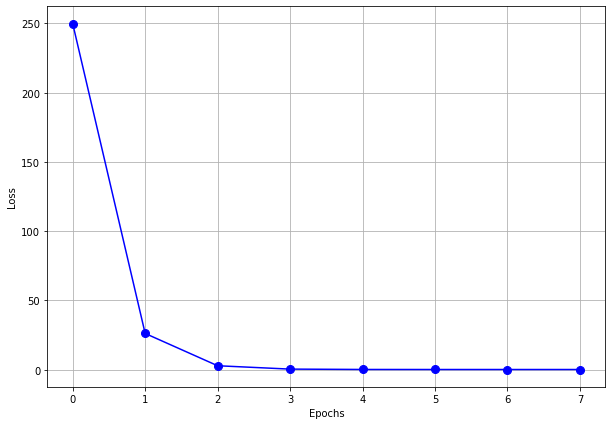

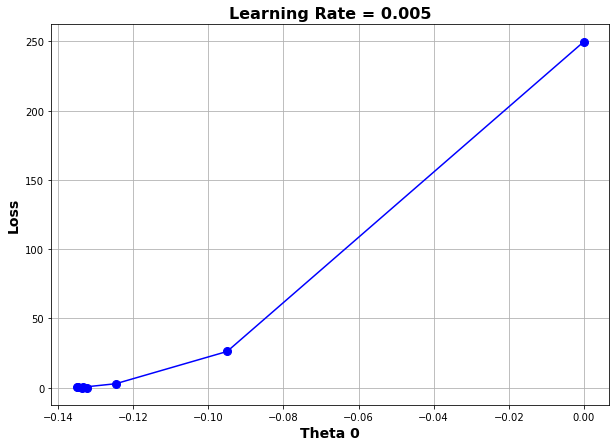

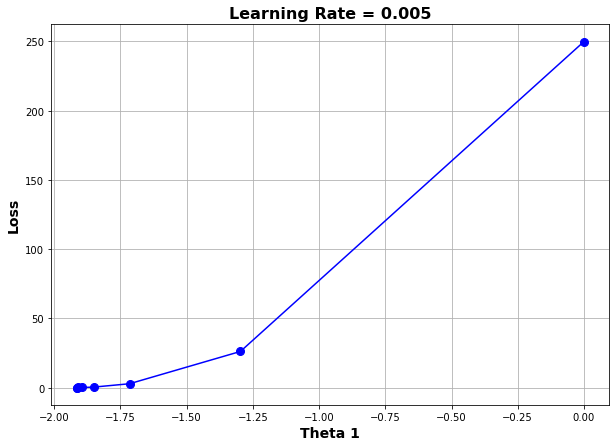

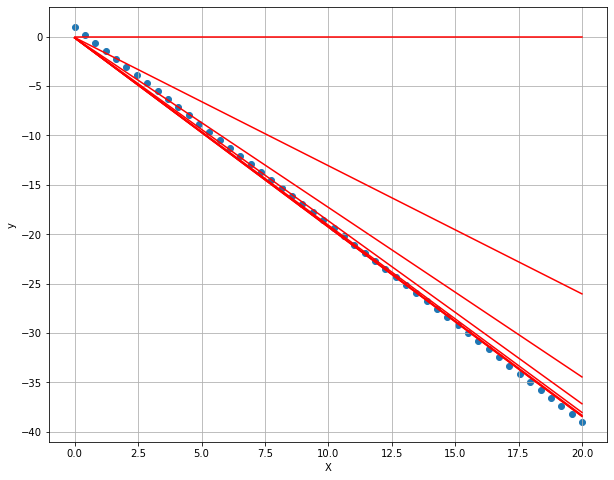

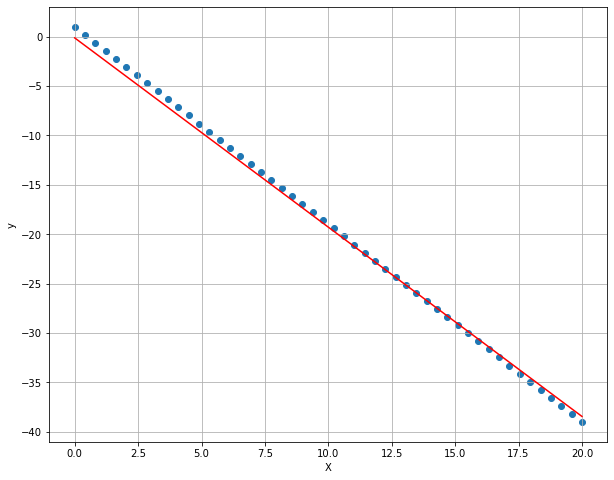

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [115]:
X

array([ 4.89795918,  1.63265306, 12.24489796, 13.06122449, 14.28571429,
        8.57142857,  3.26530612, 18.36734694,  0.81632653, 15.51020408,
        6.93877551, 20.        , 14.69387755, 11.42857143, 11.83673469,
       17.14285714,  6.53061224,  7.75510204, 15.91836735,  3.67346939,
        4.08163265, 17.95918367, 18.7755102 ,  5.71428571, 17.55102041,
       19.59183673, 10.6122449 , 16.73469388,  4.48979592,  9.79591837,
        0.40816327,  6.12244898,  8.97959184, 15.10204082,  5.30612245,
       11.02040816,  7.34693878,  2.04081633,  8.16326531, 19.18367347,
        0.        , 13.46938776, 16.32653061, 12.65306122,  2.44897959,
        9.3877551 ,  1.2244898 ,  2.85714286, 13.87755102, 10.20408163])

In [7]:
def optimize_using_SGD(X, Y,lr=0.01,iterations=1000):
    theta_0=theta_1=d_theta0=d_theta1=0
    losses=[]
    thetas_0=[]
    thetas_1=[]
    m=len(X)
    print(m)
    for i in range(0,iterations):
        
        for j in range(0,m):
            
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)

            h_0= theta_0 + (theta_1*X[j])
            error=h_0-Y[j]
            se= (error**2) / 2
            losses.append(se)
            
            d_theta0=  error
            d_theta1=error * X[j]
            grad_vector=np.array([d_theta0,d_theta1])
            
            theta_0=theta_0- (lr*d_theta0)
            theta_1=theta_1-(lr*d_theta1)
        grad_vector=np.array([d_theta0,d_theta1])    
        norm = np.linalg.norm(grad_vector)
        print(f"****************** epoch {i} ********************")
        print(f"COST {losses[i*(m)]} ")
        print("gradien vector: ")
        print(grad_vector)
        print("gradienct vector norm")
        print(norm)
        print(f" theta_0 new : {theta_0}")
        print(f"theta_1 new: {theta_1}")


        if i>0 and abs(losses[(i-1)*m]-losses[i*m])<=0.001:
            return theta_0, theta_1,h_0,thetas_0, thetas_1, losses
        if(norm<= 0.001): 
            return theta_0, theta_1,h_0,thetas_0,thetas_1,losses
        if(i==iterations-1):
                return theta_0, theta_1,h_0,thetas_0,thetas_1,losses
        

In [8]:
perm = np.random.permutation(len(X))

# shuffle X and Y using the perm array
X_new = X[perm]
y_new = y[perm]

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [9]:

theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_SGD(X_new, y_new,0.0005,300)

50
****************** epoch 0 ********************
COST 527.1305705955851 
gradien vector: 
[0.19187266 1.87956895]
gradienct vector norm
1.8893370724839125
 theta_0 new : -0.13980186138166936
theta_1 new: -1.865007803502305
****************** epoch 1 ********************
COST 0.6263616499429273 
gradien vector: 
[-0.32583901 -3.19189238]
gradienct vector norm
3.2084806417996474
 theta_0 new : -0.1364291342804363
theta_1 new: -1.915639680977712
****************** epoch 2 ********************
COST 0.03789916909796767 
gradien vector: 
[-0.3376293  -3.30738905]
gradienct vector norm
3.3245775486004803
 theta_0 new : -0.12925507780613452
theta_1 new: -1.9175172740525035
****************** epoch 3 ********************
COST 0.031517593187098535 
gradien vector: 
[-0.33583943 -3.28985563]
gradienct vector norm
3.306953007443636
 theta_0 new : -0.12202425667669962
theta_1 new: -1.918081562552604
****************** epoch 4 ********************
COST 0.030964583925064095 
gradien vector: 
[-0.33

****************** Epoch 0 ********************

Cost = 0.37828093829974396

Gradient Vector:
[[-0.86980565]
 [-1.77511358]]

Gradient Vector Norm:
1.9767625301666

theta_0_new : -0.13516909716690004
theta_1_new : -1.869971913093026

****************** Epoch 1 ********************

Cost = 0.4705021363396433

Gradient Vector:
[[-0.97005375]
 [-1.97970153]]

Gradient Vector Norm:
2.2045912095645743

theta_0_new : -0.13169704743062774
theta_1_new : -1.9207947829431942

****************** Epoch 2 ********************

Cost = 0.4672003879494755

Gradient Vector:
[[-0.96664408]
 [-1.97274302]]

Gradient Vector Norm:
2.196842232437341

theta_0_new : -0.12450421548406185
theta_1_new : -1.9226485332326042

****************** Epoch 3 ********************

Cost = 0.4612690180123547

Gradient Vector:
[[-0.96048844]
 [-1.96018048]]

Gradient Vector Norm:
2.1828526193936026

theta_0_new : -0.11725717626212058
theta_1_new : -1.923183317357008

****************** Epoch 4 ********************

Cost = 0

In [152]:
y_pred= theta_0 + theta_1*X
r2_score(y,y_pred)


0.9996365903546192

r2_score: 0.9976768960178554


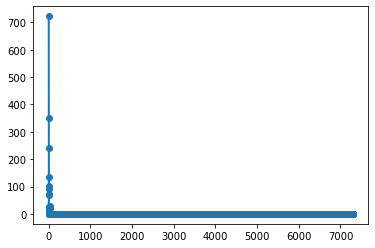

In [153]:
plot_losses(losses)


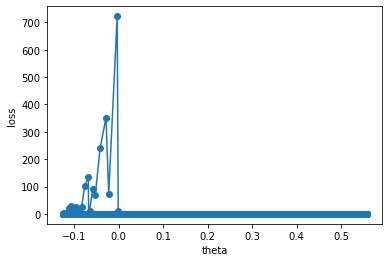

In [154]:

plot_theats_loss(thetas_0, losses)


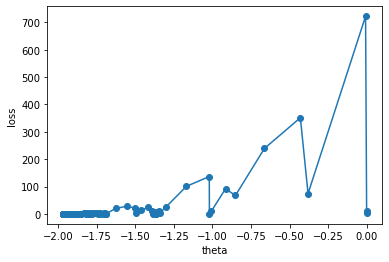

In [155]:

plot_theats_loss(thetas_1, losses)


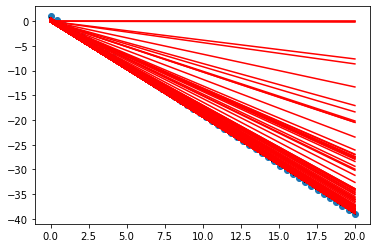

In [156]:
plot_regressions_lines()

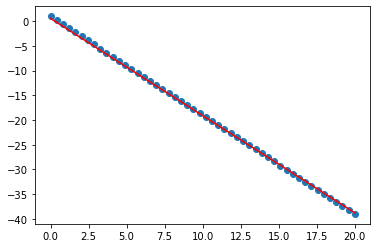

In [157]:
plot_best_regression()


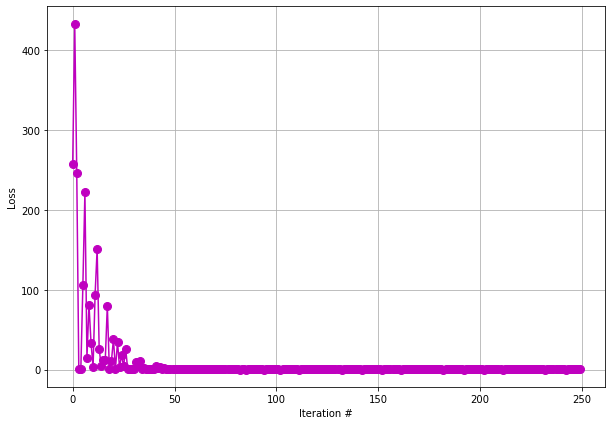

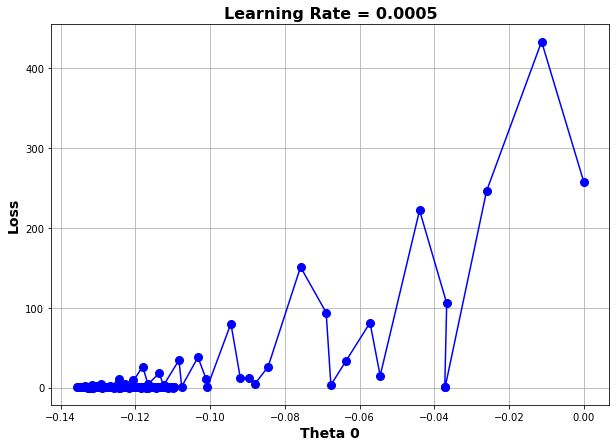

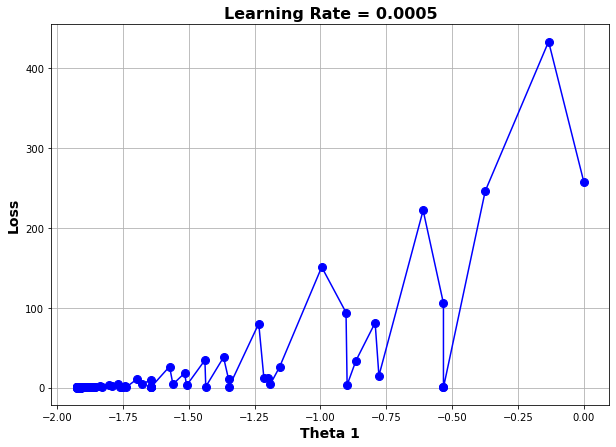

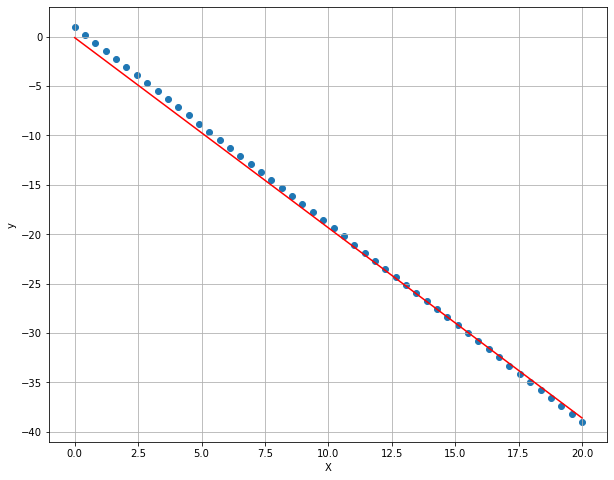

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [158]:
theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_SGD(X_new, y_new,0.0001,300)

50
****************** epoch 0 ********************
COST 2.5658059142024157 
gradien vector: 
[ 9.30283705 91.12983235]
gradienct vector norm
91.60343400494112
 theta_0 new : -0.0687973672289934
theta_1 new: -0.9504369360189732
****************** epoch 1 ********************
COST 0.20786738878894276 
gradien vector: 
[ 4.53195154 44.39462729]
gradienct vector norm
44.62534612591578
 theta_0 new : -0.1027293740912629
theta_1 new: -1.4292787168536107
****************** epoch 2 ********************
COST 0.014610160442304296 
gradien vector: 
[ 2.12878991 20.85345216]
gradienct vector norm
20.96182753452823
 theta_0 new : -0.11909869474201343
theta_1 new: -1.6705517817189983
****************** epoch 3 ********************
COST 0.16891069968978317 
gradien vector: 
[0.91838193 8.99639438]
gradienct vector norm
9.043148628807359
 theta_0 new : -0.12662164502052795
theta_1 new: -1.7921482333943126
****************** epoch 4 ********************
COST 0.3098984608503838 
gradien vector: 
[0.3088

****************** Epoch 0 ********************

Cost = 16.887127834434082

Gradient Vector:
[[ 5.81156224]
 [37.95305953]]

Gradient Vector Norm:
38.39542919503344

theta_0_new : -0.06824518438278841
theta_1_new : -0.9465294881483106

****************** Epoch 1 ********************

Cost = 3.4768759637568025

Gradient Vector:
[[ 2.63699676]
 [17.22120335]]

Gradient Vector Norm:
17.421928616911465

theta_0_new : -0.10250915532081234
theta_1_new : -1.4273881562733521

****************** Epoch 2 ********************

Cost = 0.5388930377939929

Gradient Vector:
[[1.03816476]
 [6.77985151]]

Gradient Vector Norm:
6.858875464652135

theta_0_new : -0.11904557794809867
theta_1_new : -1.6696771665089043

****************** Epoch 3 ********************

Cost = 0.027171708479479032

Gradient Vector:
[[0.23311675]
 [1.52239507]]

Gradient Vector Norm:
1.5401396595959387

theta_0_new : -0.1266525793929906
theta_1_new : -1.791785322149918

****************** Epoch 4 ********************

Cost = 0.

In [159]:

y_pred= theta_0 + theta_1*X
r2_score(y,y_pred)

0.9976542002056761

r2_score =  0.9976210193556192


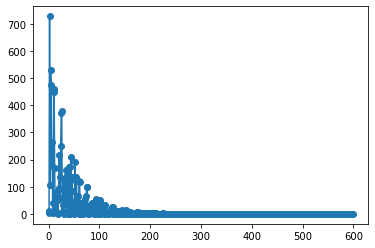

In [160]:

plot_losses(losses)

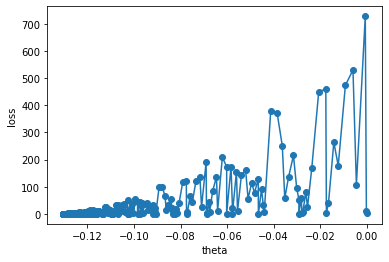

In [161]:

plot_theats_loss(thetas_0, losses)

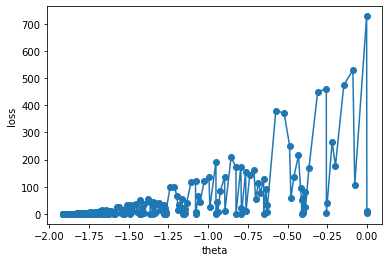

In [162]:
plot_theats_loss(thetas_1, losses)

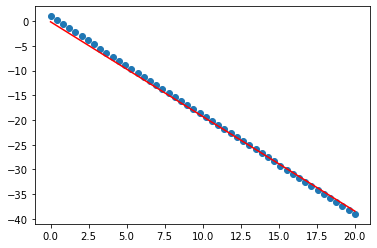

In [163]:
plot_best_regression()


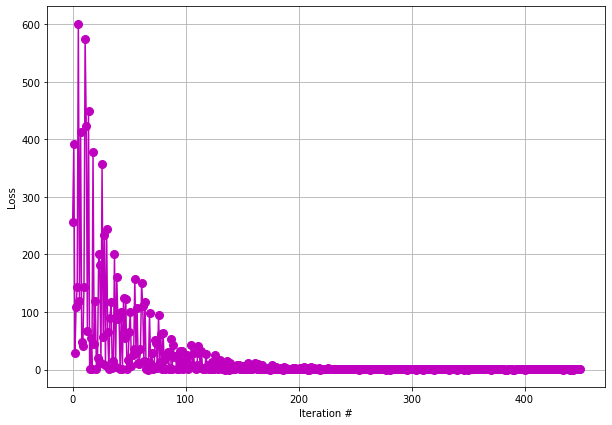

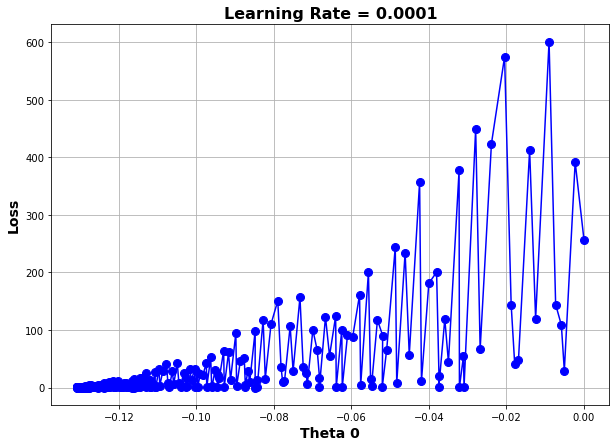

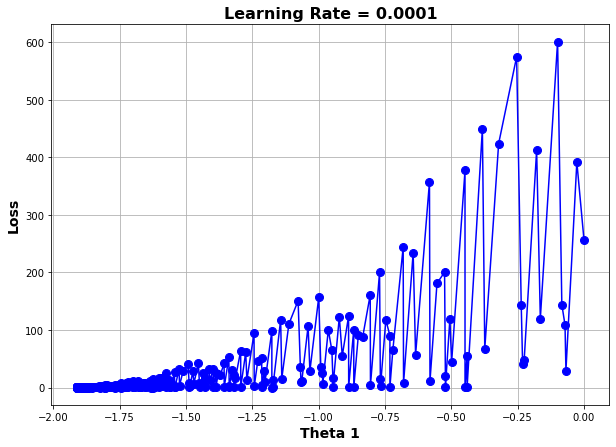

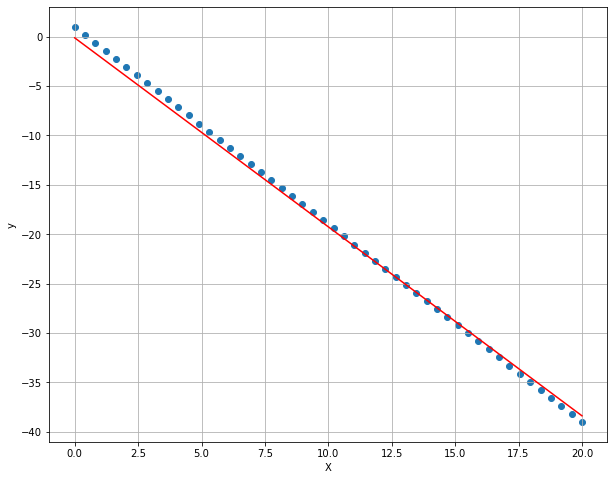

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [10]:

theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_SGD(X_new, y_new,0.00007,300)

50
****************** epoch 0 ********************
COST 527.1305705955851 
gradien vector: 
[ 11.48338809 112.49033234]
gradienct vector norm
113.07494448928968
 theta_0 new : -0.053470480723266586
theta_1 new: -0.728152068939278
****************** epoch 1 ********************
COST 204.63687474026608 
gradien vector: 
[ 6.99804697 68.55229686]
gradienct vector norm
68.90856308417044
 theta_0 new : -0.08622887602866844
theta_1 new: -1.1795788415839397
****************** epoch 2 ********************
COST 79.92611362773634 
gradien vector: 
[ 4.2175903  41.31517024]
gradienct vector norm
41.52988514630199
 theta_0 new : -0.10614772736054517
theta_1 new: -1.4594572769138416
****************** epoch 3 ********************
COST 31.519174068210464 
gradien vector: 
[ 2.49403021 24.43131632]
gradienct vector norm
24.558285844346173
 theta_0 new : -0.11810740208508516
theta_1 new: -1.6329889664446933
****************** epoch 4 ********************
COST 12.618830550273126 
gradien vector: 
[ 1.4

****************** Epoch 0 ********************

Cost = 124.0437076336173

Gradient Vector:
[[ 15.75079094]
 [205.72461637]]

Gradient Vector Norm:
206.32669530819234

theta_0_new : -0.051948440276973804
theta_1_new : -0.7135402661206246

****************** Epoch 1 ********************

Cost = 47.548348470307104

Gradient Vector:
[[  9.75175353]
 [127.36984205]]

Gradient Vector Norm:
127.7426058898493

theta_0_new : -0.0848670753436601
theta_1_new : -1.1703212347826775

****************** Epoch 2 ********************

Cost = 18.197486942756615

Gradient Vector:
[[ 6.0328247 ]
 [78.79607774]]

Gradient Vector Norm:
79.02668436189794

theta_0_new : -0.10488561670446958
theta_1_new : -1.453519053721322

****************** Epoch 3 ********************

Cost = 6.946707513134106

Gradient Vector:
[[ 3.72738716]
 [48.68424043]]

Gradient Vector Norm:
48.826720978186586

theta_0_new : -0.11690744458248394
theta_1_new : -1.6291086944831552

****************** Epoch 4 ********************

Cost

In [11]:

y_pred= theta_0 + theta_1*X
r2_score(y,y_pred)

0.9976590674820379

r2_score =  0.997655146572521


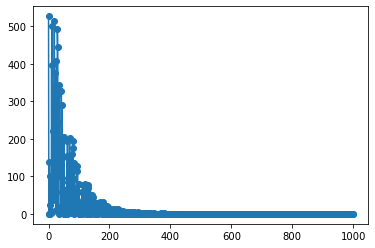

In [12]:

plot_losses(losses)

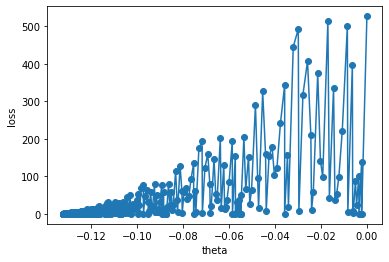

In [13]:

plot_theats_loss(thetas_0, losses)


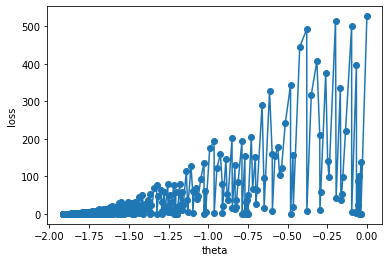

In [14]:

plot_theats_loss(thetas_1, losses)


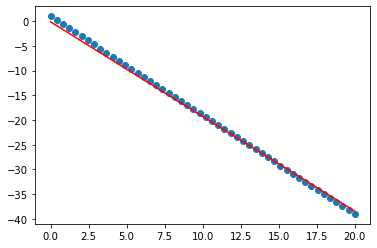

In [15]:
plot_best_regression()


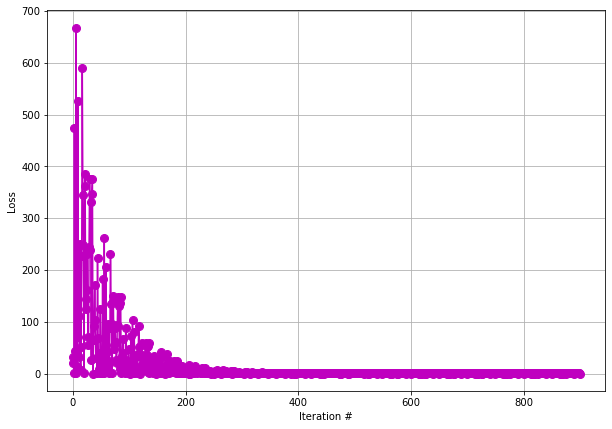

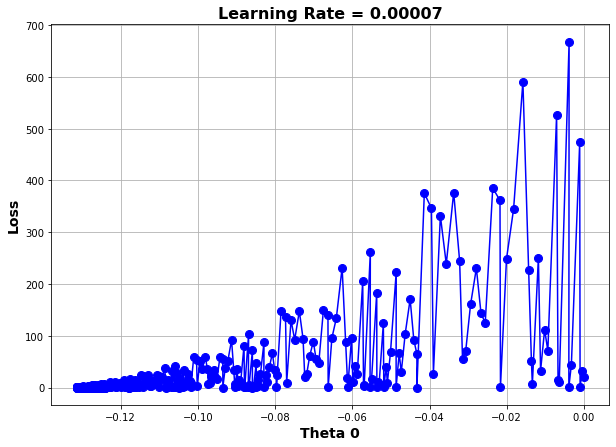

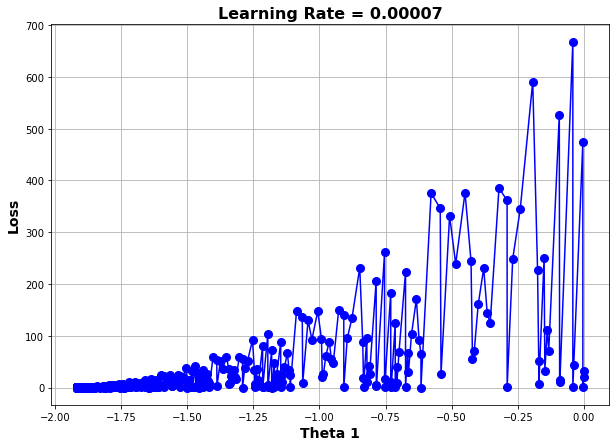

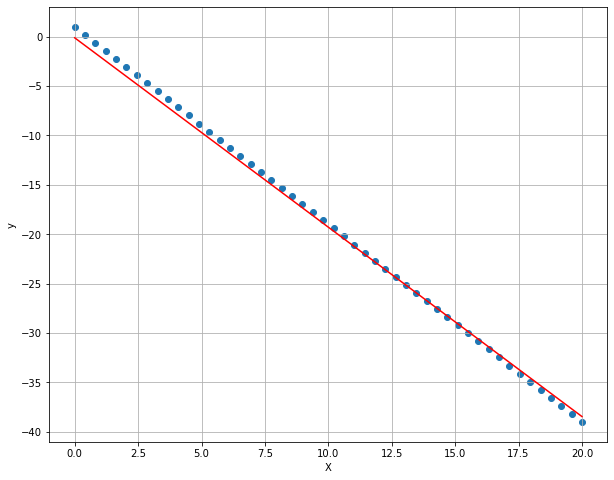

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [27]:
X[:5]
m=len(X)
int(m/5)

10

In [43]:

def optimize_using_Mini_Batch_GD(X, Y,lr,iterations, bSize):
    theta_0=theta_1=d_theta0=d_theta1=0
    losses=[]
    thetas_0=[]
    thetas_1=[]
    m=len(X)
    l=int(m/bSize)
    for i in range(0,iterations):
        
        for j in range(0,l):
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            X_b=X[j*bSize: (j*bSize)+bSize]
            Y_b=Y[j*bSize:(j*bSize)+bSize]
            h_0= theta_0 + (theta_1*X_b)
            error=h_0-Y_b
            mse= (error@error) / (len(error)*2)
            losses.append(mse)
            d_theta0= error.sum() /len(error)
            d_theta1=(error*X_b).sum() /len(error)
            grad_vector=np.array([d_theta0,d_theta1])
            
            theta_0=theta_0- (lr*d_theta0)
            theta_1=theta_1-(lr*d_theta1)
        grad_vector=np.array([d_theta0,d_theta1])    
        norm = np.linalg.norm(grad_vector)
        print(f"****************** epoch {i} ********************")
        print(f"COST {losses[i*(l)]} ")
        print("gradien vector: ")
        print(grad_vector)
        print("gradienct vector norm")
        print(norm)
        print(f" theta_0 new : {theta_0}")
        print(f"theta_1 new: {theta_1}")


        if i>0 and abs(losses[(i-1)*l]-losses[i*l])<=0.001:
            return theta_0, theta_1,h_0,thetas_0, thetas_1, losses
        if(norm<= 0.001): 
            return theta_0, theta_1,h_0,thetas_0,thetas_1,losses
        if(i==iterations-1):
                return theta_0, theta_1,h_0,thetas_0,thetas_1,losses

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [44]:
theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_Mini_Batch_GD(X_new, y_new, 0.0005,300,5)

****************** epoch 0 ********************
COST 134.53748438150768 
gradien vector: 
[ 11.99722174 161.57029615]
gradienct vector norm
162.01510401308144
 theta_0 new : -0.07136243188720824
theta_1 new: -0.9695582511530867
****************** epoch 1 ********************
COST 32.97336920434303 
gradien vector: 
[ 5.84766504 79.67017365]
gradienct vector norm
79.88449008766686
 theta_0 new : -0.10587312108759772
theta_1 new: -1.4485501876732303
****************** epoch 2 ********************
COST 8.26039909396933 
gradien vector: 
[ 2.81003929 39.21375066]
gradienct vector norm
39.31430479916727
 theta_0 new : -0.1221809243816731
theta_1 new: -1.6852146101369543
****************** epoch 3 ********************
COST 2.2642315145107963 
gradien vector: 
[ 1.3096292  19.22947458]
gradienct vector norm
19.274019334879398
 theta_0 new : -0.129497907636095
theta_1 new: -1.8021752542822422
****************** epoch 4 ********************
COST 0.8175435320630511 
gradien vector: 
[0.56856491 

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [45]:
y_pred= theta_0 + theta_1*X
r2_score(y,y_pred)

0.997639093193754

r2_score 0.9974493632266231


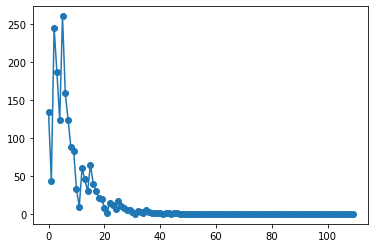

In [46]:

plot_losses(losses)



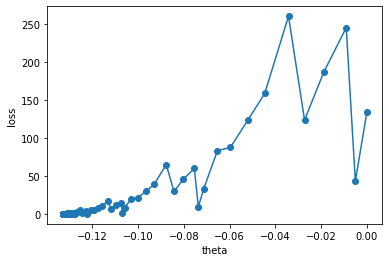

In [47]:
plot_theats_loss(thetas_0, losses)


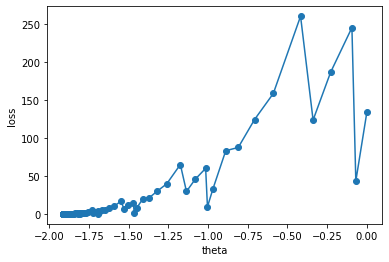

In [48]:
plot_theats_loss(thetas_1, losses)


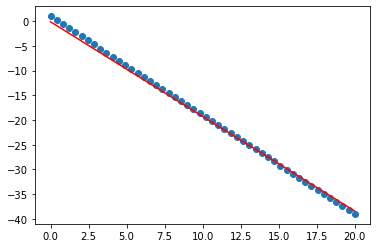

In [49]:
plot_best_regression()


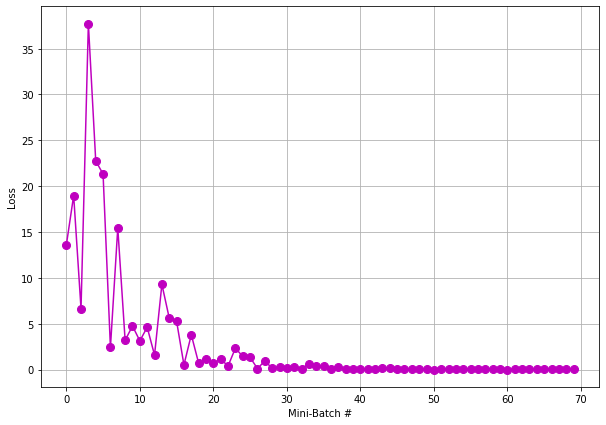

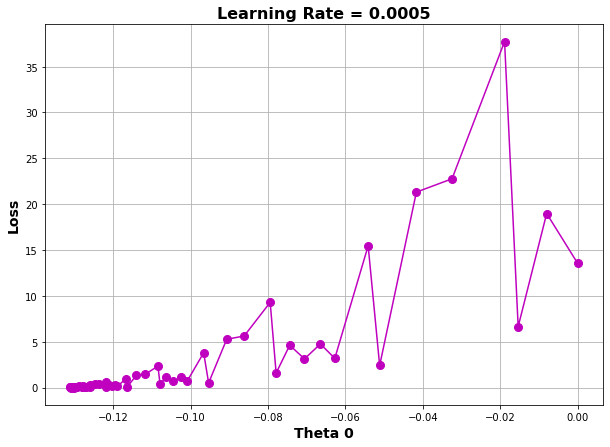

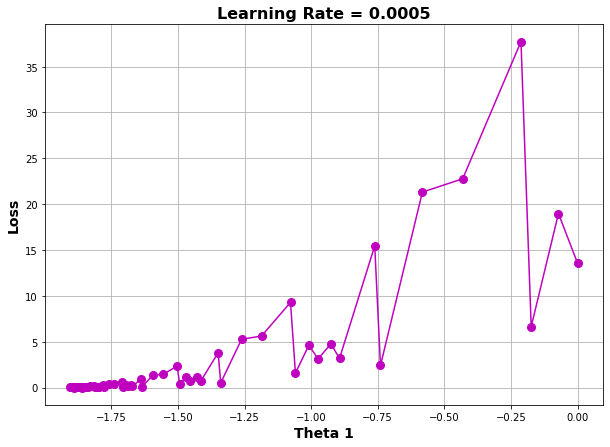

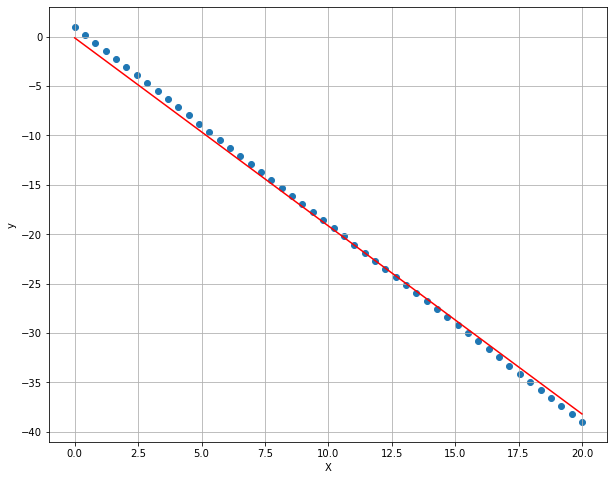

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [50]:
theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_Mini_Batch_GD(X_new, y_new, 0.0005,300,10)

****************** epoch 0 ********************
COST 90.75406080799668 
gradien vector: 
[ 16.07256148 218.36996247]
gradienct vector norm
218.96065341095948
 theta_0 new : -0.04173871052150614
theta_1 new: -0.5683634158419636
****************** epoch 1 ********************
COST 44.407803746775144 
gradien vector: 
[ 11.24319589 153.55445249]
gradienct vector norm
153.96551344965303
 theta_0 new : -0.07087688861908999
theta_1 new: -0.9681115867385074
****************** epoch 2 ********************
COST 21.67730292039991 
gradien vector: 
[  7.84672372 107.96947622]
gradienct vector norm
108.25423256984367
 theta_0 new : -0.09115320358716722
theta_1 new: -1.2492720089544693
****************** epoch 3 ********************
COST 10.570288042014466 
gradien vector: 
[ 5.45801088 75.90940693]
gradienct vector norm
76.10537394453227
 theta_0 new : -0.1051970755675542
theta_1 new: -1.447029209507571
****************** epoch 4 ********************
COST 5.172100086072682 
gradien vector: 
[ 3.77

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

In [51]:

y_pred= theta_0 + theta_1*X
r2_score(y,y_pred)

0.9976385868470207

r2_score 0.9976302004574656


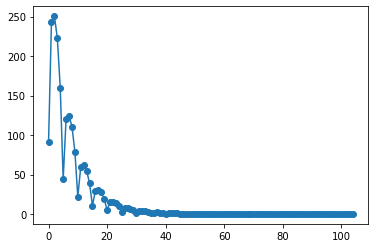

In [52]:

plot_losses(losses)

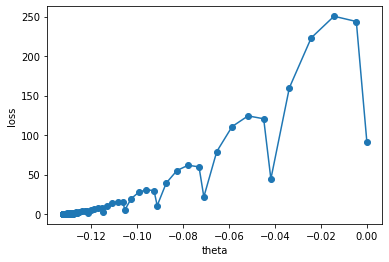

In [53]:

plot_theats_loss(thetas_0, losses)

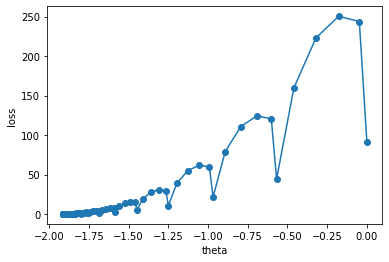

In [54]:
plot_theats_loss(thetas_1, losses)

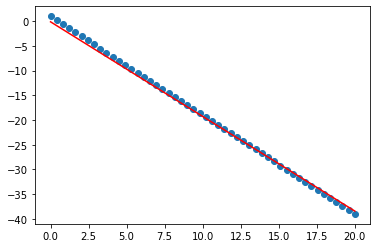

In [55]:
plot_best_regression()


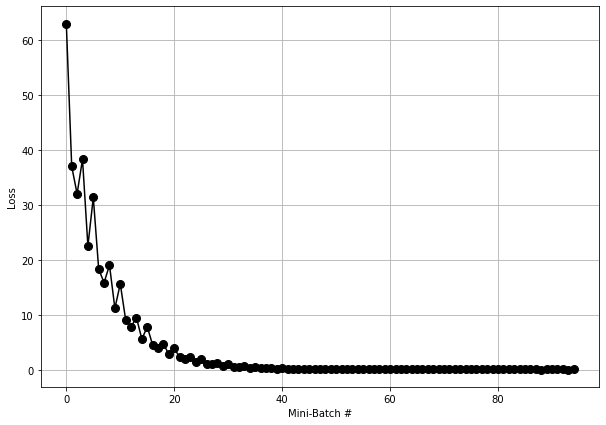

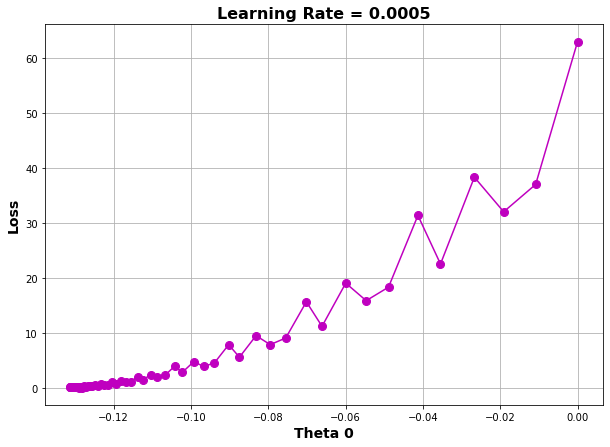

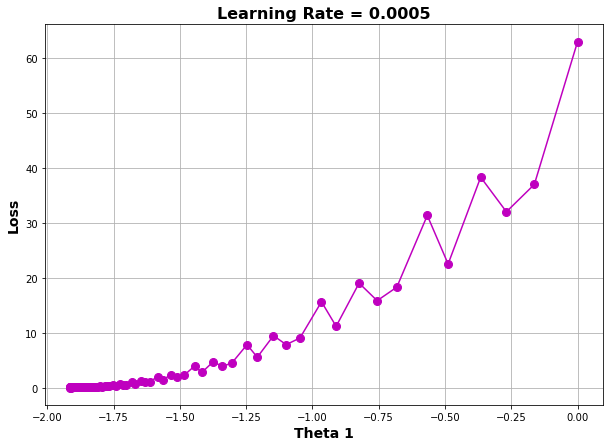

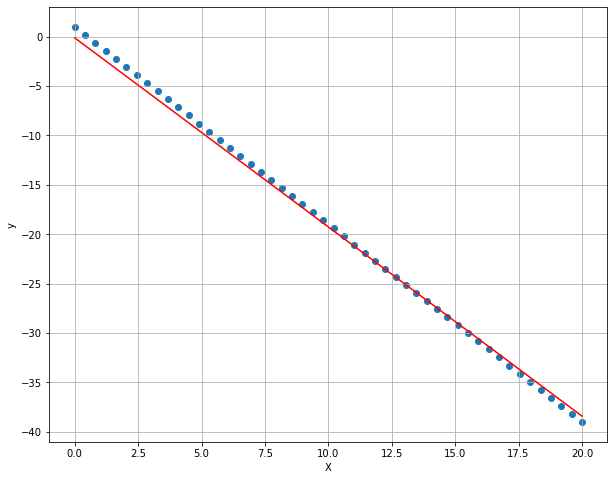

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [56]:
theta_0 , theta_1,h_0,thetas_0,thetas_1,losses=optimize_using_Mini_Batch_GD(X_new, y_new, 0.0005,300,20)


****************** epoch 0 ********************
COST 173.62036651395252 
gradien vector: 
[ 21.28382203 308.69004526]
gradienct vector norm
309.4229227521354
 theta_0 new : -0.017917421216924922
theta_1 new: -0.2447929609905008
****************** epoch 1 ********************
COST 131.9383437052863 
gradien vector: 
[ 18.54488132 269.36188233]
gradienct vector norm
269.99951162588417
 theta_0 new : -0.03350471828841584
theta_1 new: -0.4583058251064711
****************** epoch 2 ********************
COST 100.25449606350188 
gradien vector: 
[ 16.15596626 235.05959199]
gradienct vector norm
235.61414862025327
 theta_0 new : -0.04705967845474201
theta_1 new: -0.6445360024042082
****************** epoch 3 ********************
COST 76.173427307448 
gradien vector: 
[ 14.07234564 205.14089751]
gradienct vector norm
205.62300149473762
 theta_0 new : -0.05884203350968156
theta_1 new: -0.8069700576402086
****************** epoch 4 ********************
COST 57.873274046544225 
gradien vector: 
[ 

****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

In [57]:
y_pred= theta_0 + theta_1*X
r2_score(y,y_pred)

0.9975234636581093

r2_score 0.9975575226128095


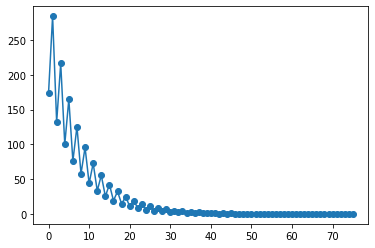

In [58]:
plot_losses(losses)


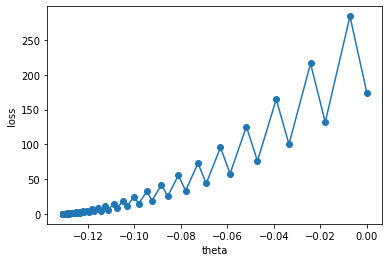

In [59]:

plot_theats_loss(thetas_0, losses)

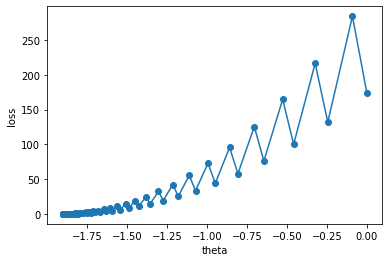

In [60]:
plot_theats_loss(thetas_1, losses)

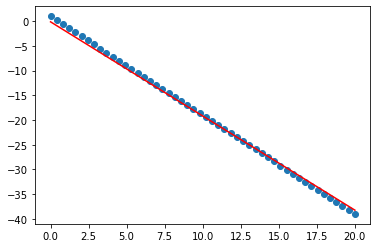

In [61]:
plot_best_regression()


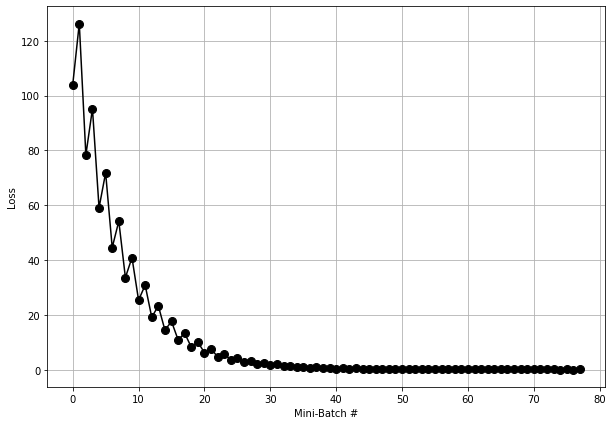

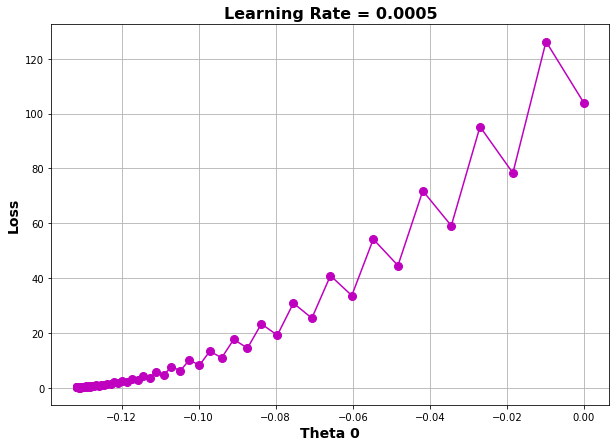

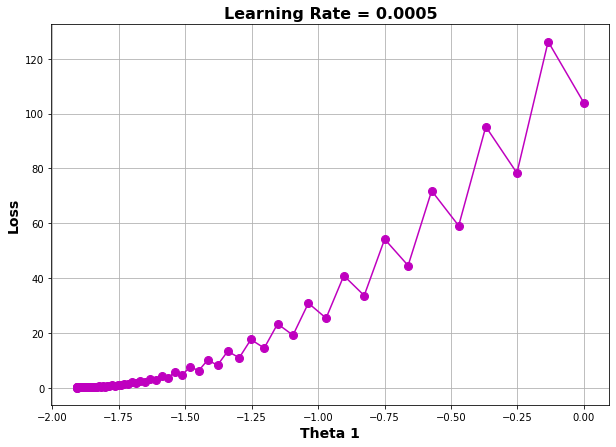

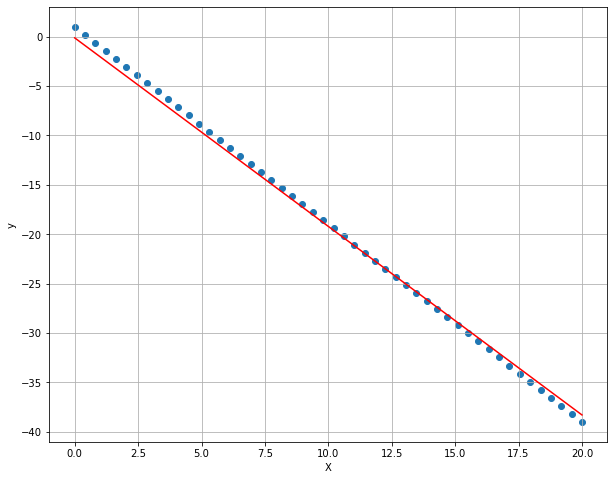